#Project 9 - Βαθιά Ενισχυτική Μάθηση

Ον/μο: Καρλάκη Μαρία ΑΕΜ: 244

Εγκατάσταση Βιβλιοθηκών

In [54]:
import gymnasium as gym
import renderlab
import numpy as np
from IPython.display import display, clear_output
from PIL import Image
import time
from renderlab import RenderFrame
import imageio.v2 as imageio
from IPython.display import Image as IPImage
import os, time
import pandas as pd
import matplotlib.pyplot as plt
from stable_baselines3 import DQN, PPO
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.vec_env import VecMonitor


In [1]:
!pip install swig

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 23.6 MB/s eta 0:00:00


In [2]:
!pip install gymnasium[box2d]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp312-cp312-linux_x86_64.whl size=2398829 sha256=9d74669aa4e0459b3b4256ad2b7891a14476e004704dcf7e0f028520e557b270
  Stored in directory: /root/.cache/pip/wheels/2a/e9/60/774da0bcd07f7dc7761a8590fa2d065e4069568e78dcdc3318
Successfully built box2d-py


In [3]:
!pip install renderlab

In [4]:
!pip install stable-baselines3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 kB 5.0 MB/s eta 0:00:00


Ερώτημα 2

*   Η συνάρτηση step(action) υλοποιεί τη μετάβαση του περιβάλλοντος στην επόμενη κατάσταση, βάσει της ενέργειας που επιλέγει ο πράκτορας. Ως αποτέλεσμα το περιβάλλον επιστρέφει τη νέα παρατήρηση (observation), η οποία περιγράφει την επόμενη κατάσταση, την ανταμοιβή (reward) που δείχνει πόσο καλή ή κακή ήταν η ενέργεια, καθώς και δύο λογικές μεταβλητές (terminated και truncated) που υποδεικνύουν αν το επεισόδιο έχει ολοκληρωθεί είτε λόγω επιτυχίας/αποτυχίας είτε λόγω χρονικού περιορισμού. Επιπλέον επιστρέφεται και ένα λεξικό info με βοηθητικές πληροφορίες.

*   Η συνάρτηση reset() χρησιμοποιείται για την επαναφορά του περιβάλλοντος στην αρχική του κατάσταση και την έναρξη ενός νέου επεισοδίου. Πρέπει να καλείται πάντα πριν από την πρώτη κλήση της step() και κάθε φορά που ένα επεισόδιο ολοκληρώνεται. Η συνάρτηση επιστρέφει την αρχική παρατήρηση του περιβάλλοντος καθώς και ένα λεξικό info με συμπληρωματικές πληροφορίες. Η reset() μπορεί να δεχθεί προαιρετικά μια τιμή seed, η οποία ελέγχει την τυχαιότητα του περιβάλλοντος, επιτρέποντας την αναπαραγωγή των ίδιων πειραμάτων. Συνήθως το seed ορίζεται μία φορά αμέσως μετά τη δημιουργία του περιβάλλοντος και δεν αλλάζει ξανά.

*   Η συνάρτηση render() χρησιμοποιείται για την οπτικοποίηση της τρέχουσας κατάστασης του περιβάλλοντος, ώστε ο χρήστης να μπορεί να παρακολουθήσει τη συμπεριφορά του πράκτορα. Ο τρόπος απεικόνισης εξαρτάται από την παράμετρο render_mode που ορίζεται κατά τη δημιουργία του περιβάλλοντος. Για παράδειγμα με render_mode="human" το περιβάλλον εμφανίζεται σε παράθυρο για ανθρώπινη παρακολούθηση, ενώ με render_mode="rgb_array" επιστρέφεται μια εικόνα της κατάστασης με τη μορφή πίνακα numpy. Η render() είναι ιδιαίτερα χρήσιμη για την αξιολόγηση και την κατανόηση της συμπεριφοράς ενός εκπαιδευμένου πράκτορα.

Ερώτημα 3

Το περιβάλλον LunarLander-v3 αποτελεί ένα κλασικό πρόβλημα ελέγχου όπου ο πράκτορας καλείται να προσγειώσει ένα σκάφος με ασφάλεια ανάμεσα σε δύο σημαίες.

*   Ο χώρος παρατήρησης (Observation Space) αποτελείται από ένα διάνυσμα 8 συνεχών τιμών που περιγράφουν πλήρως την κινηματική κατάσταση του σκάφους (θέση, ταχύτητα, γωνία και επαφή των ποδιών με το έδαφος), προσφέροντας την απαραίτητη πληροφορία για τη λήψη αποφάσεων.
*   Το Action Space είναι διακριτό και αποτελείται από 4 δυνατές ενέργειες. Οι ενέργειες αυτές αντιστοιχούν στον έλεγχο των κινητήρων του διαστημοπλοίου: η πρώτη ενέργεια δεν ενεργοποιεί κανέναν κινητήρα, η δεύτερη ενεργοποιεί τον αριστερό κινητήρα προσανατολισμού, η τρίτη ενεργοποιεί τον κεντρικό κινητήρα που παράγει ώθηση προς τα πάνω και η τέταρτη ενεργοποιεί τον δεξί κινητήρα προσανατολισμού. Μέσω αυτών των τεσσάρων ενεργειών, ο πράκτορας καλείται να ελέγξει την κίνηση και τον προσανατολισμό του σκάφους ώστε να επιτύχει ασφαλή προσγείωση.
*   Η συνάρτηση ανταμοιβής (Reward Function) είναι σχεδιασμένη να καθοδηγεί το σκάφος προς το σημείο προσγείωσης με τη μέγιστη δυνατή οικονομία καυσίμου και ασφάλεια. Επιβραβεύει την προσέγγιση στο στόχο και την επιτυχή προσγείωση, ενώ τιμωρεί αυστηρά τη συντριβή και τη σπατάλη ενέργειας, με στόχο την απόλυτη ισορροπία ταχύτητας και ακρίβειας.





Ερώτημα 4

In [57]:
import renderlab as rl
env = gym.make("LunarLander-v3", render_mode="rgb_array")

env = rl.RenderFrame(env, "random_agent_render")

observation, info = env.reset()

while True:
    action = env.action_space.sample()  # random agent
    observation, reward, terminated, truncated, info = env.step(action)

    if terminated or truncated:
        break

env.play()

env.close()



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


Ερώτημα 5

In [31]:
env = gym.make("LunarLander-v3")

episodes = 5
episode_rewards = []

for ep in range(episodes):
    obs, info = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()
        obs, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        total_reward += reward

    episode_rewards.append(total_reward)
    print(f"Episode {ep+1}: Total Reward = {total_reward:.2f}")

env.close()

mean_score = np.mean(episode_rewards)
print(f"\nΜέσο score random agent σε {episodes} επεισόδια: {mean_score:.2f}")


Episode 1: Total Reward = -87.76
Episode 2: Total Reward = -74.86
Episode 3: Total Reward = -89.27
Episode 4: Total Reward = -135.17
Episode 5: Total Reward = -335.99

Μέσο score random agent σε 5 επεισόδια: -144.61


Ο random agent εκτελέστηκε για 5 επεισόδια στο περιβάλλον LunarLander-v3. Σε κάθε επεισόδιο το συνολικό score υπολογίστηκε ως το άθροισμα των rewards μέχρι τον τερματισμό του επεισοδίου.
Τα αποτελέσματα έδειξαν ότι ο random agent πέτυχε χαμηλή απόδοση, με μέσο score −144.61 γεγονός που είναι αναμενόμενο, καθώς οι ενέργειες επιλέγονται τυχαία χωρίς καμία στρατηγική.

Ερώτημα 6

Εκπαίδευση DQN

In [45]:
TOTAL_TIMESTEPS = 50_000

os.makedirs("logs_ll/dqn", exist_ok=True)

env_dqn = Monitor(
    gym.make("LunarLander-v3"),
    filename="logs_ll/dqn/monitor.csv"
)

dqn_model = DQN(
    "MlpPolicy",
    env_dqn,
    learning_rate=1e-3,
    buffer_size=50_000,
    learning_starts=5_000,
    batch_size=64,
    gamma=0.99,
    train_freq=4,
    target_update_interval=1000,
    exploration_fraction=0.2,
    exploration_final_eps=0.05,
    verbose=1,
)

start_time = time.perf_counter()
dqn_model.learn(total_timesteps=TOTAL_TIMESTEPS)
dqn_train_time = time.perf_counter() - start_time

dqn_model.save("dqn_lunarlander")
env_dqn.close()

print(f"DQN training time: {dqn_train_time:.2f} seconds")


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 97       |
|    ep_rew_mean      | -153     |
|    exploration_rate | 0.963    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 7013     |
|    time_elapsed     | 0        |
|    total_timesteps  | 388      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 94.8     |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.928    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 6928     |
|    time_elapsed     | 0        |
|    total_timesteps  | 758      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 103      |
|    ep_rew_mean      | -154     |
|    exploration_rate | 0.882    |
| t

Εκπαίδευση PPO

In [46]:
TOTAL_TIMESTEPS = 50_000

os.makedirs("logs_ll/ppo", exist_ok=True)

env_ppo = Monitor(
    gym.make("LunarLander-v3"),
    filename="logs_ll/ppo/monitor.csv"
)

ppo_model = PPO(
    "MlpPolicy",
    env_ppo,
    learning_rate=3e-4,
    n_steps=1024,
    batch_size=64,
    gamma=0.99,
    gae_lambda=0.95,
    clip_range=0.2,
    verbose=1,
)

start_time = time.perf_counter()
ppo_model.learn(total_timesteps=TOTAL_TIMESTEPS)
ppo_train_time = time.perf_counter() - start_time
ppo_model.save("ppo_lunarlander")
env_ppo.close()


Using cpu device
Wrapping the env in a DummyVecEnv.
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 92.2     |
|    ep_rew_mean     | -182     |
| time/              |          |
|    fps             | 1682     |
|    iterations      | 1        |
|    time_elapsed    | 0        |
|    total_timesteps | 1024     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 98.6        |
|    ep_rew_mean          | -204        |
| time/                   |             |
|    fps                  | 1241        |
|    iterations           | 2           |
|    time_elapsed         | 1           |
|    total_timesteps      | 2048        |
| train/                  |             |
|    approx_kl            | 0.002788044 |
|    clip_fraction        | 0           |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.39       |
|    explained_varia

Ερώτημα 7

In [42]:
def mean_reward_5_episodes(model):
    env = gym.make("LunarLander-v3")
    episode_rewards = []

    for _ in range(5):
        obs, info = env.reset()
        done = False
        total_reward = 0.0

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total_reward += reward

        episode_rewards.append(total_reward)

    env.close()
    return np.mean(episode_rewards), episode_rewards


dqn_mean, dqn_rewards = mean_reward_5_episodes(dqn_model)
ppo_mean, ppo_rewards = mean_reward_5_episodes(ppo_model)

print("DQN episode rewards:", dqn_rewards)
print("PPO episode rewards:", ppo_rewards)
print(f"DQN mean reward (5 episodes): {dqn_mean:.2f}")
print(f"PPO mean reward (5 episodes): {ppo_mean:.2f}")


DQN episode rewards: [np.float64(-46.6949796422953), np.float64(-75.56216709202378), np.float64(-28.23943415930213), np.float64(-31.521300664698952), np.float64(-9.98934846567494)]
PPO episode rewards: [np.float64(-205.73408935017466), np.float64(-434.1615952333873), np.float64(-390.148810866079), np.float64(-373.90387868102636), np.float64(-341.9017347332316)]
DQN mean reward (5 episodes): -38.40
PPO mean reward (5 episodes): -349.17


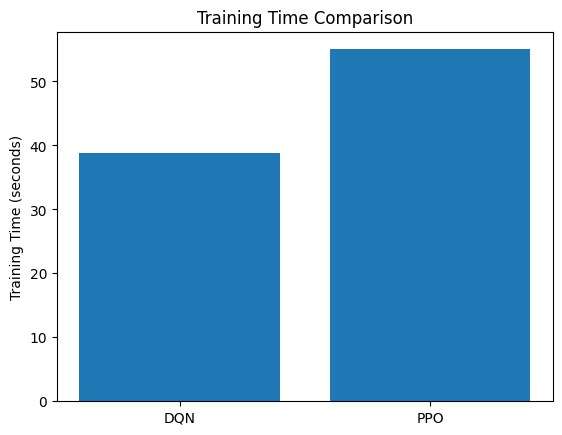

In [43]:
algorithms = ["DQN", "PPO"]
training_times = [dqn_train_time, ppo_train_time]

plt.figure()
plt.bar(algorithms, training_times)
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison")
plt.show()

  return datetime.utcnow().replace(tzinfo=utc)



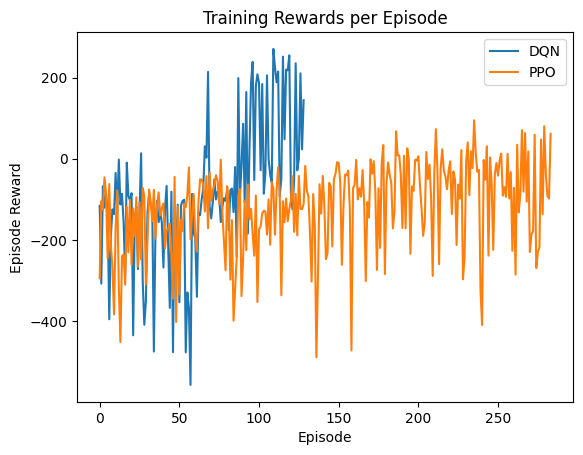

In [47]:
dqn_log = "logs_ll/dqn/monitor.csv"
ppo_log = "logs_ll/ppo/monitor.csv"

dqn_df = pd.read_csv(dqn_log, comment="#")
ppo_df = pd.read_csv(ppo_log, comment="#")

plt.figure()
plt.plot(dqn_df["r"], label="DQN")
plt.plot(ppo_df["r"], label="PPO")
plt.xlabel("Episode")
plt.ylabel("Episode Reward")
plt.title("Training Rewards per Episode")
plt.legend()
plt.show()

Στα πειράματα εκπαίδευσης με 50.000 βήματα στο περιβάλλον LunarLander-v3, ο DQN παρουσίασε σαφώς καλύτερη απόδοση από τον PPO. Συγκεκριμένα ο DQN ολοκλήρωσε την εκπαίδευση σε μικρότερο χρόνο και πέτυχε σημαντικά υψηλότερο μέσο reward κατά την αξιολόγηση 5 επεισοδίων, σε σύγκριση με τον PPO ο οποίος εμφάνισε πολύ χαμηλότερη απόδοση. Από το γράφημα των rewards κατά την εκπαίδευση παρατηρείται ότι ο DQN παρουσιάζει ταχύτερη βελτίωση και φτάνει σε θετικές ή λιγότερο αρνητικές τιμές reward, ενώ ο PPO παραμένει ασταθής με μεγάλες διακυμάνσεις και κυρίως αρνητικά rewards. Τα αποτελέσματα δείχνουν ότι για τον συγκεκριμένο αριθμό βημάτων και χωρίς περαιτέρω ρύθμιση παραμέτρων, ο DQN μαθαίνει αποτελεσματικότερα από τον PPO στο συγκεκριμένο περιβάλλον.

Ερώτημα 8

In [55]:
TOTAL_TIMESTEPS_DQN = 100_000
TOTAL_TIMESTEPS_PPO = 200_000
LOG_DIR = "logs_tuned"
os.makedirs(LOG_DIR, exist_ok=True)


DQN

In [49]:
dqn_dir = os.path.join(LOG_DIR, "dqn")
os.makedirs(dqn_dir, exist_ok=True)

env_dqn = Monitor(gym.make("LunarLander-v3"), filename=os.path.join(dqn_dir, "monitor.csv"))

dqn_model = DQN(
    "MlpPolicy",
    env_dqn,
    learning_rate=0.00063,
    buffer_size=50_000,
    batch_size=128,
    gamma=0.99,
    learning_starts=0,
    train_freq=4,
    target_update_interval=250,
    exploration_fraction=0.12,
    exploration_final_eps=0.1,
    policy_kwargs=dict(net_arch=[256, 256]),
    verbose=1,
)

t0 = time.perf_counter()
dqn_model.learn(total_timesteps=TOTAL_TIMESTEPS_DQN)
dqn_train_time = time.perf_counter() - t0

dqn_model.save("dqn_tuned_lunarlander_v3")
env_dqn.close()

print(f"DQN tuned training time: {dqn_train_time:.2f} sec")


Using cpu device
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 81       |
|    ep_rew_mean      | -158     |
|    exploration_rate | 0.976    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 1091     |
|    time_elapsed     | 0        |
|    total_timesteps  | 324      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 1.34     |
|    n_updates        | 80       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.8     |
|    ep_rew_mean      | -138     |
|    exploration_rate | 0.946    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 780      |
|    time_elapsed     | 0        |
|    total_timesteps  | 718      |
| train/              |          |
|    learning_rate    | 0.00063  |
|  

PPO

In [50]:
ppo_dir = os.path.join(LOG_DIR, "ppo")
os.makedirs(ppo_dir, exist_ok=True)

N_ENVS = 8

vec_env = make_vec_env("LunarLander-v3", n_envs=N_ENVS)
vec_env = VecMonitor(vec_env, filename=os.path.join(ppo_dir, "monitor.csv"))

ppo_model = PPO(
    "MlpPolicy",
    vec_env,
    batch_size=64,
    ent_coef=0.01,
    gae_lambda=0.98,
    gamma=0.999,
    n_epochs=4,
    n_steps=1024,
    verbose=1,
)

t0 = time.perf_counter()
ppo_model.learn(total_timesteps=TOTAL_TIMESTEPS_PPO)
ppo_train_time = time.perf_counter() - t0

ppo_model.save("ppo_tuned_lunarlander_v3")
vec_env.close()

print(f"PPO tuned training time: {ppo_train_time:.2f} sec")


  warnings.warn(



Using cpu device
---------------------------------
| rollout/           |          |
|    ep_len_mean     | 91.4     |
|    ep_rew_mean     | -186     |
| time/              |          |
|    fps             | 4272     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 8192     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 90.5         |
|    ep_rew_mean          | -156         |
| time/                   |              |
|    fps                  | 2989         |
|    iterations           | 2            |
|    time_elapsed         | 5            |
|    total_timesteps      | 16384        |
| train/                  |              |
|    approx_kl            | 0.0043071145 |
|    clip_fraction        | 0.015        |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.00069     

Υπολογισμός για 5 επεισόδια

In [51]:
def mean_reward_5_episodes(model):
    env = gym.make("LunarLander-v3")
    ep_rewards = []

    for _ in range(5):
        obs, info = env.reset()
        done = False
        total = 0.0

        while not done:
            action, _ = model.predict(obs, deterministic=True)
            obs, reward, terminated, truncated, info = env.step(action)
            done = terminated or truncated
            total += reward

        ep_rewards.append(total)

    env.close()
    return float(np.mean(ep_rewards)), ep_rewards


dqn_mean, dqn_eps = mean_reward_5_episodes(dqn_model)
ppo_mean, ppo_eps = mean_reward_5_episodes(ppo_model)

print("DQN tuned episode rewards:", dqn_eps)
print("PPO tuned episode rewards:", ppo_eps)
print(f"DQN tuned mean reward (5 eps): {dqn_mean:.2f}")
print(f"PPO tuned mean reward (5 eps): {ppo_mean:.2f}")


DQN tuned episode rewards: [np.float64(284.71893432934985), np.float64(284.0697569695519), np.float64(238.16270346869135), np.float64(237.37934775806735), np.float64(228.9405443794537)]
PPO tuned episode rewards: [np.float64(-81.814547539931), np.float64(-110.57712211836105), np.float64(-75.08528000089647), np.float64(-77.06223136420228), np.float64(-44.96446220546652)]
DQN tuned mean reward (5 eps): 254.65
PPO tuned mean reward (5 eps): -77.90


Γραφήματα Σύγκρισης

Χρόνος εκπαίδευσης

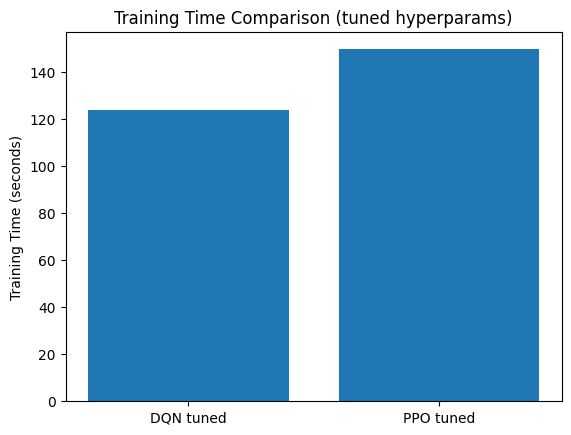

In [52]:
plt.figure()
plt.bar(["DQN tuned", "PPO tuned"], [dqn_train_time, ppo_train_time])
plt.ylabel("Training Time (seconds)")
plt.title("Training Time Comparison (tuned hyperparams)")
plt.show()

Rewards ανά επεισόδιο (κατά την εκπαίδευση)

  return datetime.utcnow().replace(tzinfo=utc)



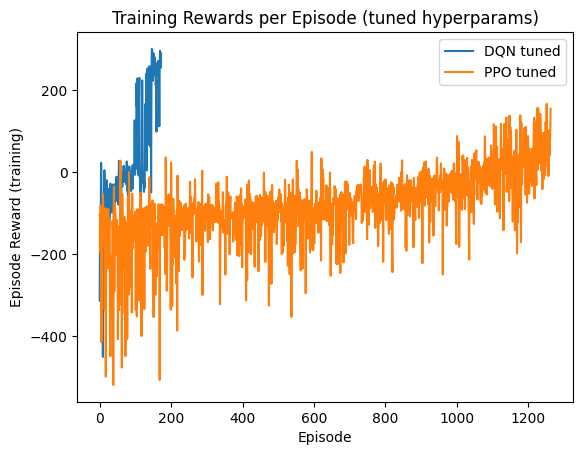

In [53]:
dqn_df = pd.read_csv(os.path.join(dqn_dir, "monitor.csv"), comment="#")
ppo_df = pd.read_csv(os.path.join(ppo_dir, "monitor.csv"), comment="#")

plt.figure()
plt.plot(dqn_df["r"], label="DQN tuned")
plt.plot(ppo_df["r"], label="PPO tuned")
plt.xlabel("Episode")
plt.ylabel("Episode Reward (training)")
plt.title("Training Rewards per Episode (tuned hyperparams)")
plt.legend()
plt.show()

Μετά τη ρύθμιση των υπερπαραμέτρων των αλγορίθμων DQN και PPO, με βάση προτεινόμενες τιμές από τη βιβλιογραφία και έτοιμα benchmarks (SB3 RL Zoo), παρατηρήθηκε σημαντική βελτίωση της απόδοσης ιδιαίτερα για τον DQN. Ο DQN tuned πέτυχε πολύ υψηλά rewards κατά την εκπαίδευση, με σταθερή σύγκλιση σε θετικές τιμές και μέσο reward 254.65 σε 5 επεισόδια, υποδεικνύοντας επιτυχημένη προσγείωση στο LunarLander. Αντίθετα ο PPO tuned, παρότι παρουσίασε βελτίωση σε σχέση με τις αρχικές ρυθμίσεις, παρέμεινε σε αρνητικά rewards με μέσο reward −77.90. Όσο αφορά τον χρόνο εκπαίδευσης, ο PPO ήταν πάλι πιο αργός από τον DQΝ.